In [561]:
import numpy as np

class Perceptron:
    def __init__(self, eta=0.01, n_iter=1000):
        self.eta = eta
        self.n_iter = n_iter
        self.betazero=0
        
    def weighted_sum(self, X):
        return np.dot(self.beta.T,X.T) + self.betazero
    
    def predict(self, X):
        return np.where(self.weighted_sum(X) >= 0.0, 1, -1).T

    
    def fit(self, X, Y,tol=10**-3):

        # initializing the weights to 0
        self.beta = np.random.random((X[0].size,1))
        self.betazero=np.random.random()
        
        # training the model n_iter times
        for _ in range(self.n_iter):
            gradiant_beta = []
            gradient_betazero=[]
            for x , y in zip(X,Y):
                if y*(self.predict(x)[0]) <0:
                    gradiant_beta.append(y*x)
                    gradient_betazero.append(y)
            if not gradiant_beta :
                print(" no erroes -> converge")
                return self
            oldbetazero=self.betazero
            oldbeta=self.beta
            self.betazero+=self.eta*np.sum(np.array(gradient_betazero))
            self.beta += self.eta*np.sum(np.array(gradiant_beta),axis=0).reshape(self.beta.shape)
            if ((abs(self.betazero-oldbetazero))+np.linalg.norm((self.beta)-(oldbeta)) < tol):
                print("converge")
                return self
            

        return self

In [5]:
import pandas as pd
from sklearn.utils import shuffle
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
# Shuffling the data
df = shuffle(df)

df.tail()

,0,1,2,3,4
119,6.0,2.2,5.0,1.5,Iris-virginica
4,5.0,3.6,1.4,0.2,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
82,5.8,2.7,3.9,1.2,Iris-versicolor


In [224]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X = df.iloc[:, 0:4].values
Y = df.iloc[:, 4].values
Y= np.where( Y =="Iris-setosa",1,-1)
train_data, test_data, train_labels, test_labels = train_test_split(
                            X, Y, test_size=0.25)

In [225]:
train_data.shape, train_labels.shape


((112, 4), (112,))

In [221]:
perceptron_e = Perceptron(eta=0.1,n_iter=100)
perceptron_e.fit(train_data,train_labels)

In [222]:
predecty=perceptron_e.predict(test_data)


In [223]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predecty, test_labels)
print('Accuracy:', round(accuracy, 2) * 100, "%")


Accuracy: 100.0 %


In [394]:
from sklearn.linear_model import Perceptron as P

perceptron = P(random_state = 42, max_iter = 20, tol = 0.001)
perceptron.fit(train_data, train_labels)
test_preds = perceptron.predict(test_data)

In [395]:
test_accuracy = accuracy_score(test_preds, test_labels)
print("Accuracy on test data: ", round(test_accuracy, 2) * 100, "%")

Accuracy on test data:  100.0 %


Linear classification

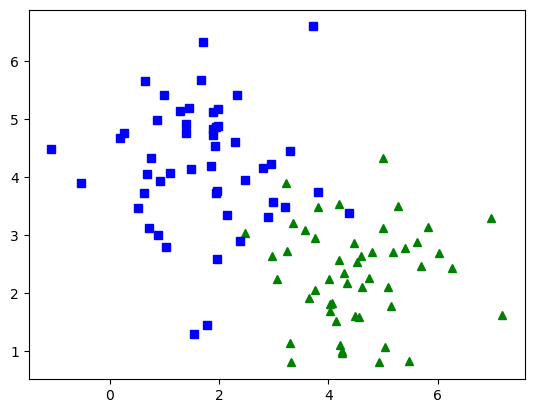

In [585]:
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [586]:
perceptron_2= Perceptron(eta=0.01,n_iter=100)

y_train = np.where(y_train==1,1,-1)
y_test = np.where(y_test==1,1,-1)
y_train

perceptron_2.fit(x_train,y_train,tol=10**-3)

y_predict=perceptron_2.predict(x_test)


converge


In [587]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predict, y_test)
print('Accuracy:', round(accuracy, 2) * 100, "%")


Accuracy: 100.0 %


In [588]:
beta=perceptron_2.beta
beta_0=perceptron_2.betazero

b1,b2=beta

xmin,xmax=x_train[:,0].min()-0.5,x_train[:,0].max()+0.5
xmin2, xmax2 = x_train[:, 1].min() - 0.5, x_train[:, 1].max() + 0.5
x1_values=np.linspace(xmin,xmax,100)
x2_values=-(b1*x1_values+beta_0)/b2

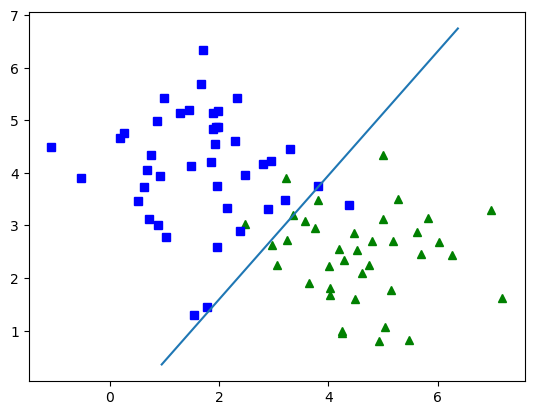

In [589]:
plt.plot(x_train[:, 0][y_train == -1], x_train[:, 1][y_train == -1], 'g^')
plt.plot(x_train[:, 0][y_train == 1], x_train[:, 1][y_train == 1], 'bs')
plt.plot(x1_values[ (x2_values > xmin2) & (x2_values < xmax2)  ],x2_values[(x2_values > xmin2) & (x2_values < xmax2)])
plt.show()